In [1]:
using CSV
using DataFrames
using Ranges
import Combinatorics: combinations
using GLM
using StatsBase
using StatsPlots
using Statistics
using Distributions
using Random
using MultivariateStats

In [2]:
Credits= CSV.read("Data/Credit.csv", DataFrame,select=collect(2:13))
describe(Credits)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Income,45.2189,10.354,33.1155,186.634,0,Float64
2,Limit,4735.6,855,4622.5,13913,0,Int64
3,Rating,354.94,93,344.0,982,0,Int64
4,Cards,2.9575,1,3.0,9,0,Int64
5,Age,55.6675,23,56.0,98,0,Int64
6,Education,13.45,5,14.0,20,0,Int64
7,Gender,,Male,,Female,0,String7
8,Student,,No,,Yes,0,String3
9,Married,,No,,Yes,0,String3


In [3]:
X = CSV.read("Data/Credit.csv", DataFrame,select=collect(2:11))
y = CSV.read("Data/Credit.csv", DataFrame, select= [12])
describe(X)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Income,45.2189,10.354,33.1155,186.634,0,Float64
2,Limit,4735.6,855,4622.5,13913,0,Int64
3,Rating,354.94,93,344.0,982,0,Int64
4,Cards,2.9575,1,3.0,9,0,Int64
5,Age,55.6675,23,56.0,98,0,Int64
6,Education,13.45,5,14.0,20,0,Int64
7,Gender,,Male,,Female,0,String7
8,Student,,No,,Yes,0,String3
9,Married,,No,,Yes,0,String3


In [25]:
n_features=size(X,2)
println(range(n_features))
println(n_features)
#subsets=combinations(range(0,n_features),2)
max_size= 5
k=1
subsets = (combinations(range(n_features),k) for k in range(min(n_features,max_size)))
for subset in subsets
    for s in subset
        #print(names(X[:,s]))
    end
end

Base.OneTo(10)
10


In [ ]:
function best_subset(estimator,X,y,max_size=,cv=)
    n_features = size(X,2)
    subsets = (combinations(range(0,n_features),k+1) for k in range(0,min(n_features,max_size)))
   
    best_size_subset = []
    for subsets_k in subsets
        best_score = -Inf
        best_subset = nothing 
        for subset in subsets_k
            curve_fit(estimator
        end 
    end
            
end


In [13]:
Iterators.partition(names(Credits),1)

Base.Iterators.PartitionIterator{Vector{String}}(["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Student", "Married", "Ethnicity", "Balance"], 1)

In [16]:
results=[]
append!(results, [1.0, 2.0])

2-element Vector{Any}:
 1.0
 2.0

In [ ]:
using GLM
function processSubset(feature_set)
    

In [ ]:
function getBest(k)
    results =[]
    for combo in collect(Iterators.partition(names(Credits), k))
        append!(results,processSubset(combo))
    end

In [11]:
using LinearAlgebra: norm, I
using Optim: optimize, LBFGS, minimizer

In [34]:
X_train =CSV.read("Data/Hitters_X_train.csv",DataFrame,select = collect(2:20))
Y_train =CSV.read("Data/Hitters_y_train.csv",DataFrame,select = [2])
describe(X_train)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,AtBat,397.687,19,381.0,687,0,Int64
2,Hits,107.672,1,103.0,213,0,Int64
3,HmRun,11.0611,0,9.0,40,0,Int64
4,Runs,53.7786,0,50.0,130,0,Int64
5,RBI,49.9008,0,46.0,121,0,Int64
6,Walks,39.9924,0,35.0,105,0,Int64
7,Years,7.08397,1,6.0,20,0,Int64
8,CAtBat,2524.36,19,1897.0,9528,0,Int64
9,CHits,690.557,4,491.0,2583,0,Int64


In [35]:
for col in 1:19
    X_train[!,col]  = ( X_train[!,col] .- mean(X_train[!,col], dims=1))./ std(X_train[!,col], dims=1)
end
#print(X_train)
#Y_train = (Y_train[!,1] .- mean(Y_train[!,1] , dims =1)) ./ std(Y_train[!,1],dims=1)

In [37]:
for col in 1:19
    X_test[!,col]  = ( X_test[!,col] .- mean(X_test[!,col], dims=1))./ std(X_test[!,col], dims=1)
end

In [57]:
describe(X_train)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,AtBat,1.3899e-16,-2.42864,-0.107019,1.85545,0,Float64
2,Hits,8.55973e-17,-2.22649,-0.0975106,2.19845,0,Float64
3,HmRun,8.43261e-17,-1.3622,-0.253826,3.5639,0,Float64
4,Runs,-4.23749e-17,-2.01578,-0.141634,2.857,0,Float64
5,RBI,0.0,-1.96548,-0.153642,2.80044,0,Float64
6,Walks,-5.08499e-17,-1.8009,-0.224812,2.92736,0,Float64
7,Years,-3.47474e-17,-1.31279,-0.233897,2.787,0,Float64
8,CAtBat,5.93249e-17,-1.12618,-0.282003,3.14819,0,Float64
9,CHits,6.92565e-17,-1.09388,-0.317952,3.0152,0,Float64


In [3]:
using MLJ
using Optim
using LinearAlgebra

In [4]:
import MLJLinearModels
using MLJLinearModels: RidgeRegression,fit
using MLJLinearModels: LassoRegression

In [142]:
coefs = Matrix(0,3)

LoadError: MethodError: no method matching (Matrix)(::Int64, ::Int64)
[0mClosest candidates are:
[0m  (Matrix)([91m::UniformScaling[39m, ::Integer, [91m::Integer[39m) at C:\Users\vs789\AppData\Local\Programs\Julia-1.7.2\share\julia\stdlib\v1.7\LinearAlgebra\src\uniformscaling.jl:492
[0m  (Matrix)([91m::UndefInitializer[39m, ::Integer, [91m::Integer[39m) at C:\Users\vs789\AppData\Local\Programs\Julia-1.7.2\share\julia\base\baseext.jl:33

In [49]:
n_lambdas = 200

lambdas = 10 .^ range(3,0.5, n_lambdas)
scores = []
coefs = []
for lambda in lambdas
    lasso = LassoRegression(lambda)
    m =MLJLinearModels.fit(lasso,X_train,Y_train)
    y1 =hcat(X_test)*m[1:19]
    score= sum((Y_test .- y1 ).^2)/sum((y1 .- mean(Y_test)).^2)
    append!(coefs,m)
    append!(scores,score)
end

In [38]:
r = Y_train - hcat(X_train,ones(131))*m
e = sqrt(sum(abs2.(r)) / 131)

LoadError: UndefVarError: m not defined

In [273]:
#print(lambdas)

In [160]:
a = [1,2,3,4]
a = reshape(a,2,2)
a

2×2 Matrix{Int64}:
 1  3
 2  4

In [50]:
print( scores)

Any[1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.7018328412687935, 1.70183284126879

In [20]:
size(coeff)
coeff = reshape(coefs, 20,200)

20×200 Matrix{Any}:
 0.0       0.0       0.0       …  -1.28923    -1.28924    -1.28924
 0.0       0.0       0.0           1.78752     1.78752     1.78753
 0.0       0.0       0.0           1.83764     1.83765     1.83765
 0.0       0.0       0.0          -0.783312   -0.78331    -0.783309
 0.0       0.0       0.0           5.16412     5.16413     5.16413
 0.0       0.0       0.0       …   6.69435     6.69436     6.69436
 0.0       0.0       0.0           0.0224138   0.0224054   0.0223977
 0.150912  0.151606  0.152246     -0.289206   -0.289205   -0.289205
 0.0       0.0       0.0           0.876       0.876001    0.876002
 0.0       0.0       0.0           0.460126    0.460132    0.460137
 0.0       0.0       0.0       …   1.76781     1.76781     1.76781
 0.0       0.0       0.0          -0.730467   -0.73047    -0.730473
 0.0       0.0       0.0          -0.440587   -0.440587   -0.440587
 0.0       0.0       0.0           0.330052    0.330062    0.330071
 0.0       0.0       0.0         

In [18]:
coeff = reshape(coefs, 20,200) 
size(coeff)
n_coeff = []
for i in 1:20
    append!(n_coeff,normalize(coeff[i,:]))
end

In [21]:
n_coeff = reshape(n_coeff,20,200)


20×200 Matrix{Any}:
 0.0         0.0323508  0.0395624  …  0.0289082  0.0289222  0.0289249
 0.0         0.0332922  0.0396107     0.0289095  0.0289224  0.028925
 0.0         0.0341604  0.0396861     0.0289108  0.0289227  0.028925
 0.0         0.0349612  0.0396197     0.0289119  0.0289229  0.0289251
 0.00024989  0.0356998  0.0396482     0.028913   0.0289231  0.0289251
 0.00367821  0.0363809  0.0396203  …  0.028914   0.0289233  0.0289252
 0.00685022  0.0370089  0.038772      0.0289149  0.0289235  0.0289252
 0.00977544  0.0375879  0.0383431     0.0289157  0.0289237  0.0289252
 0.0124731   0.038122   0.0382367     0.0289165  0.0289238  0.0289253
 0.0149608   0.0386131  0.0382365     0.0289172  0.0289239  0.0289253
 0.017255    0.0390668  0.0382273  …  0.0289178  0.0289241  0.0289253
 0.0193707   0.0392659  0.0382407     0.0289184  0.0289242  0.0289253
 0.0213218   0.0393221  0.0380352     0.028919   0.0289243  0.0289254
 0.0231211   0.0393756  0.0381315     0.0289195  0.0289244  0.0289254
 0

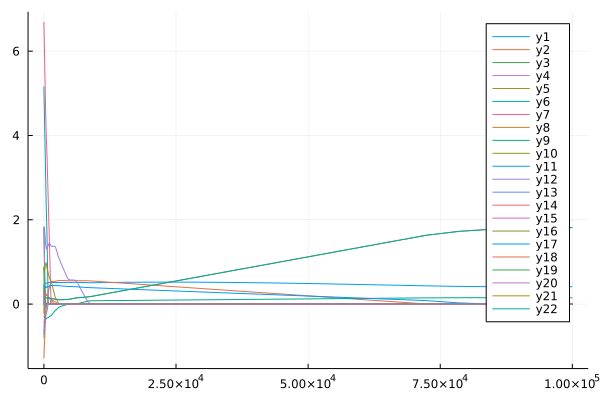

In [22]:
for i in 1:20
    plot!(lambdas,coeff[i,:]);
end
display(plot!(lambdas,coeff[20,:]));

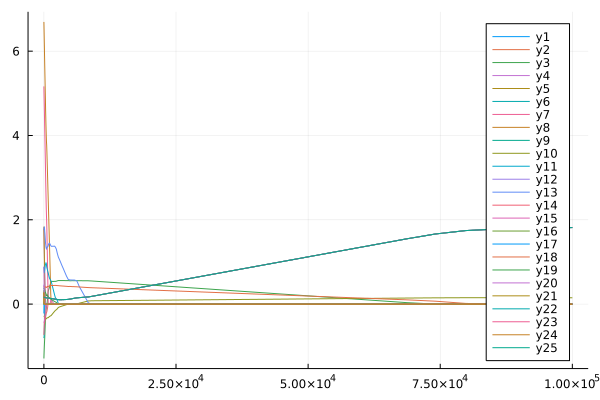

In [ ]:
for i in 19
    plot!(lambdas,coeff[i,:]);
end
display(plot!(lambdas,coeff[20,:]));

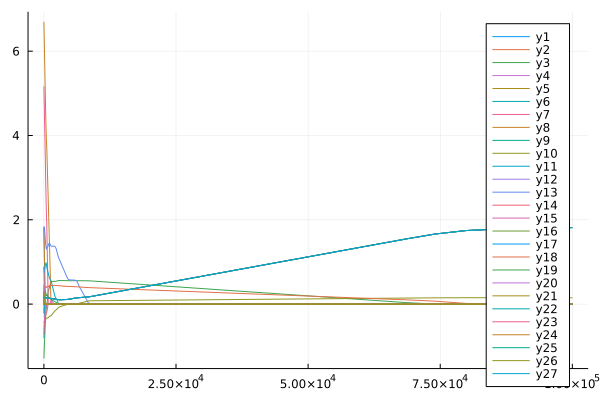

In [83]:
y1 = hcat(X_test,ones(132))*m
y2 = y1 - Y_test
y_mean = mean(Y_test)
R2 = sum((Y_train .- y_mean).^2)/sum((y1 .- vcat(Y_train,ones(1))).^2)

0.7244545591715162

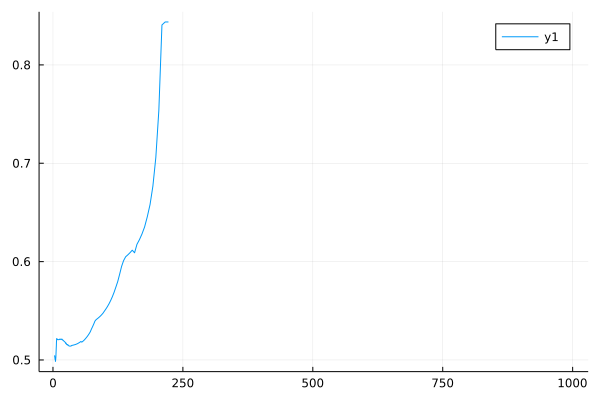

In [45]:
using Plots
plot(lambdas,1 .- scores)

In [146]:
println(coefs)

Any[]


In [134]:
using LinearAlgebra
n_coeff = []
for coef in coefs
    push!(n_coeff,normalize(coef))
    #print(coef)
end

In [98]:
y1 =hcat(X_train,ones(131))*m

131-element Vector{Float64}:
  577.9373615229779
  517.0815748035674
 1100.5168782233902
  767.6277783148774
  559.7160262852689
  296.84963178698456
  252.00326515320762
  342.5772793919294
  651.231616344583
  183.3444089959527
  641.0847276972289
  923.8397960050536
   77.04419332910035
    ⋮
  258.09353312934843
  437.4772424408148
  217.05096924812574
  455.89782805257363
  231.70964510883556
  148.41690877296065
 1042.9505891134877
  565.652588390737
  269.3615891501254
  304.20085160267683
  867.414315876456
  325.08619184113377

In [99]:
norm(cor(y1,Y_train) .^ 2)

0.4071948893442665

In [17]:
using MLJ
using MLJSerialization


In [25]:
o = @objective(lasso, X_train, Y_train)

LoadError: LoadError: UndefVarError: @objective not defined
in expression starting at In[25]:1

In [22]:
using LossFunctions
mach = MLJ.machine(lasso(),X_train,Y_train)

LoadError: MethodError: objects of type MLJLinearModels.GeneralizedLinearRegression{MLJLinearModels.L2Loss, MLJLinearModels.ScaledPenalty{MLJLinearModels.L1Penalty}} are not callable

In [36]:
X_test = CSV.read("Data/Hitters_X_test.csv",DataFrame,select = collect(2:20))
Y_test =CSV.read("Data/Hitters_y_test.csv",DataFrame,select = [2])
describe(X_test)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,AtBat,409.553,151,424.0,680,0,Int64
2,Hits,107.985,39,108.0,238,0,Int64
3,HmRun,12.1742,0,9.0,34,0,Int64
4,Runs,55.7045,15,54.5,119,0,Int64
5,RBI,53.0606,11,48.0,117,0,Int64
6,Walks,42.2273,7,38.5,97,0,Int64
7,Years,7.53788,1,6.0,24,0,Int64
8,CAtBat,2789.72,181,2047.0,14053,0,Int64
9,CHits,753.576,50,555.0,4256,0,Int64


In [30]:
m

20-element Vector{Float64}:
 -1.2864456551609482
  1.7831438617875208
  1.8317407585024015
 -0.7843466011593426
  5.159915360539489
  6.690030843875227
  0.028327683625562254
 -0.28930602024801516
  0.8750626702429716
  0.4560077503930208
  1.7686916913933808
 -0.7281580448973444
 -0.440260848743237
  0.32249156414157365
 -0.2153816524525831
  0.42650846143267407
  0.38349543013300114
  0.8846091771212818
  0.26785428694624336
  0.16915083242286652

In [38]:
X_test = Matrix(X_test)
Y_test= vec(convert(Array,Y_test))

132-element Vector{Float64}:
  475.0
  500.0
  750.0
  100.0
   75.0
 1100.0
  517.143
  550.0
  700.0
  240.0
  100.0
  115.0
  600.0
    ⋮
  425.0
  160.0
  425.0
  900.0
  277.5
  160.0
 1300.0
  550.0
  165.0
  875.0
  960.0
 1000.0

In [23]:
Ridge = RidgeRegression(0.1)
MLJLinearModels.fit(Ridge,X_train,Y_train)

LoadError: BoundsError: attempt to access 20-element Vector{Float64} at index [20:39]

In [39]:
X_train = Matrix(X_train)
#Y_train = Matrix(Y_train)

131×19 Matrix{Float64}:
  0.495832   0.319937   1.96292   …  -0.754471   -0.401783    0.944294
  1.19488    1.05047    0.485089     -0.685969   -0.716013    0.944294
  0.553552   0.403426   1.10085      -0.274952   -0.244668    0.944294
  1.56685    2.1567     0.361937     -0.692819   -0.716013    0.944294
 -0.55595   -0.556703  -0.99274       0.704637    0.226678    0.944294
 -0.74835   -0.661064  -0.99274   …   0.163465   -0.244668   -1.05091
 -1.31272   -1.26636   -0.130673     -0.733921   -0.558898   -1.05091
 -0.434098  -0.640192   0.977699     -0.768172   -0.401783    0.944294
  1.45783    1.48879   -0.869588      2.25965     0.855138   -1.05091
 -1.33196   -1.28724   -1.11589       0.389524    1.16937    -1.05091
  0.636924   0.403426  -0.50013   …  -0.761322   -0.873128    0.944294
  1.47065    1.44704    1.71661       2.47886     0.698023   -1.05091
 -2.42222   -2.22649   -1.3622        0.684086   -0.401783    0.944294
  ⋮                               ⋱                       

In [8]:
#Y_train = reshape(Y_train,(131,1))

In [40]:
Y_train= vec(convert(Array,Y_train))

131-element Vector{Float64}:
 1220.0
  662.5
 1183.333
  740.0
  320.0
  341.667
  245.0
  670.0
  575.0
  175.0
  700.0
 1350.0
 2127.333
    ⋮
  265.0
  737.5
   70.0
  550.0
   90.0
   90.0
 1900.0
  625.0
  300.0
  185.0
  740.0
  650.0

In [39]:
Y_train[20:39]

20-element Vector{Float64}:
  190.0
  105.0
  105.0
  145.0
   90.0
  600.0
  200.0
   91.5
  733.333
  400.0
 1175.0
 1008.333
 1800.0
  775.0
  340.0
  235.0
  525.0
  175.0
  625.0
   90.0

In [25]:
n_lambdas = 100
lambdas = 10 .^ range(3,0.5, n_lambdas)

coefs = []
scores = []
outs = []
betas = []
for lambda in lambdas
    function loss(beta) 
        beta = norm(Y_train - X_train*beta)^2 + lambda*norm(beta)^2
    end
    function grad!(G,beta)
        G .= -2*transpose(X_train) * (Y_train - X_train * beta) + 2*lambda*beta
    end
    function hessian!(H,beta)
        H .= X_train'X_train + lambda*I
    end 
    
    start = rand(19)
    out = optimize(loss,grad!,hessian!,start,LBFGS())
    push!(outs,out)
   # println(out)
    
   # println(out)
end
#print(start)

In [54]:
#print(outs[:,1])
n_lambdas = 200
lambdas = 10 .^ range(3, 0.5, n_lambdas)

200-element Vector{Float64}:
 1000.0
  971.4874305813416
  943.7878277775382
  916.8780118215464
  890.735463861044
  865.3383071140452
  840.6652885618325
  816.6957611638568
  793.4096665797492
  770.7875183839595
  748.8103857590023
  727.4598776536365
  706.7181273927491
    ⋮
    4.347013158125024
    4.223068643690166
    4.102658105827192
    3.9856807817837754
    3.872038781812555
    3.7616370072543894
    3.6543830709572562
    3.5501872199642195
    3.448962260405758
    3.3506234845336076
    3.2550885998350583
    3.1622776601683795

In [35]:
Regression.solve()

LoadError: UndefVarError: Regression not defined

In [26]:
using Plots
norm_coefs = []
for coef in coefs
    c = nor
    append!(norm_coefs,norm(coef))
end
print(norm_coefs)

Any[2.1723901077489916, 2.405812986029173, 2.538785979339434, 2.4038191361817898, 2.308360887766365, 2.3691193166742592, 2.2502308996869282, 2.6307388501454314, 1.9216241838802994, 2.4983654453997053, 2.6846223792794714, 2.36696443392676, 2.7905530094224638, 1.8935872044358946, 2.050518432066169, 2.573111631009967, 2.4237509006224056, 2.7806396706638483, 2.4668399343731657, 2.3638571887498347, 2.6709518133905936, 2.3207083945018288, 2.531036793474347, 2.7603469759224213, 2.5993685238330078, 2.427906587314028, 2.2210221147210145, 2.5317125868211403, 2.226212472370775, 2.460062456586126, 2.605811933230908, 2.2371855204010562, 2.025437692995075, 2.439381128436612, 2.609444726700027, 2.711201221352965, 2.313802884662856, 2.6078383934027753, 2.656698413036728, 2.325395731764183, 2.7237490321789197, 2.454194745990444, 2.1879834860112943, 2.5546165827679745, 2.4105204171658734, 2.2959619224499446, 2.1533637748924006, 2.327446288485976, 2.1402911833203158, 2.619555743211117, 2.358888908635561,

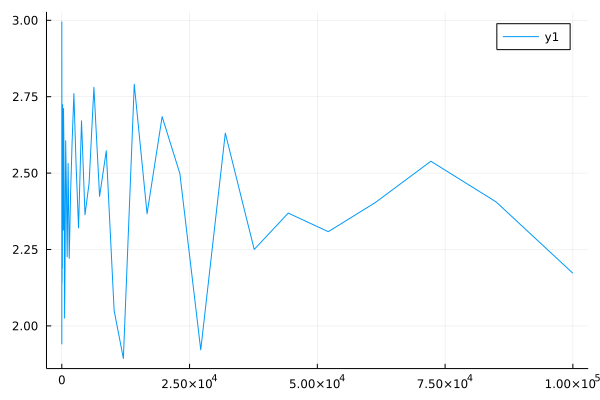

In [27]:
norm_coef_line = plot(lambdas,norm_coefs)

In [12]:
import Regression: Options,solve

LoadError: ArgumentError: Package Regression not found in current path:
- Run `import Pkg; Pkg.add("Regression")` to install the Regression package.


In [47]:
print(out)

 * Status: success

 * Candidate solution
    Final objective value:     5.294955e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.39e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.30e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 7.14e-07 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    107
    ∇f(x) calls:   107


In [49]:
sample = CSV.read("Data/Hitters.csv", DataFrame,select = collect(2:13))

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,293,66,1,30,29,14,1,293,66,1,30,29
2,315,81,7,24,38,39,14,3449,835,69,321,414
3,479,130,18,66,72,76,3,1624,457,63,224,266
4,496,141,20,65,78,37,11,5628,1575,225,828,838
5,321,87,10,39,42,30,2,396,101,12,48,46
6,594,169,4,74,51,35,11,4408,1133,19,501,336
7,185,37,1,23,8,21,2,214,42,1,30,9
8,298,73,0,24,24,7,3,509,108,0,41,37
9,323,81,6,26,32,8,2,341,86,6,32,34


In [6]:
μ = [0, 0]
σ = [1.0 1.0; 1.0 2.0]
dist = Distributions.MvNormal(μ, σ)

FullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [1.0 1.0; 1.0 2.0]
)


In [30]:
describe(sample)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,AtBat,380.929,16,379.5,687,0,Int64
2,Hits,101.025,1,96.0,238,0,Int64
3,HmRun,10.7702,0,8.0,40,0,Int64
4,Runs,50.9099,0,48.0,130,0,Int64
5,RBI,48.028,0,44.0,121,0,Int64
6,Walks,38.7422,0,35.0,105,0,Int64
7,Years,7.4441,1,6.0,24,0,Int64
8,CAtBat,2648.68,19,1928.0,14053,0,Int64
9,CHits,717.571,4,508.0,4256,0,Int64


In [47]:
sample = Matrix(sample)
sample = transpose(sample)

12×2 transpose(::Matrix{Int64}) with eltype Int64:
 293   315
  66    81
   1     7
  30    24
  29    38
  14    39
   1    14
 293  3449
  66   835
   1    69
  30   321
  29   414

In [52]:
p = fit(PCA, sample)

LoadError: MethodError: no method matching fit(::Type{PCA}, ::DataFrame)
[0mClosest candidates are:
[0m  fit(::Type{T}, [91m::FormulaTerm[39m, [91m::Any[39m, [91m::Any...[39m; contrasts, kwargs...) where T<:RegressionModel at C:\Users\vs789\.julia\packages\StatsModels\qY2YS\src\statsmodel.jl:78
[0m  fit(::Type{T}, [91m::FormulaTerm[39m, [91m::Any[39m, [91m::Any...[39m; contrasts, kwargs...) where T<:StatisticalModel at C:\Users\vs789\.julia\packages\StatsModels\qY2YS\src\statsmodel.jl:78
[0m  fit(::Type{PCA}, [91m::AbstractMatrix{T}[39m; method, maxoutdim, pratio, mean) where T<:Real at C:\Users\vs789\.julia\packages\MultivariateStats\zLpz8\src\pca.jl:255
[0m  ...

In [44]:
proj = projection(p) # get principle component
x = sample[1, :]
y = sample[2, :]

scatter(x, y)
#first_pca = proj[:, 2] # principle components are sorted in descending order
second_pca = proj[:, 1]
#plot!([-2,  2], [(2 * first_pca[1] / first_pca[2]), (-2 * first_pca[1] / first_pca[2])])
plot!([-2,  2], [(2 * second_pca[1] / second_pca[2]), (-2 * second_pca[1] / second_pca[2])])


LoadError: BoundsError: attempt to access 322×1 Matrix{Float64} at index [1:322, 0]

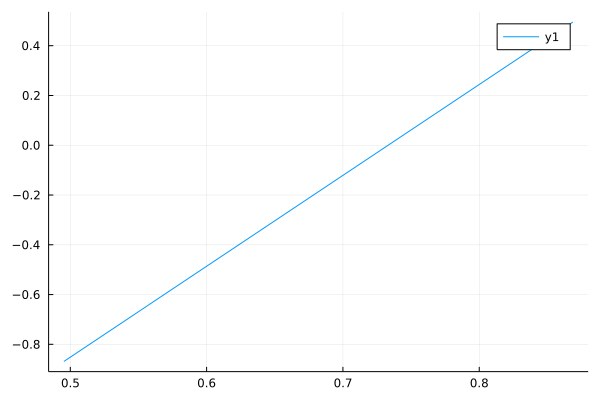

In [11]:
plot(second_pca,first_pca)

In [24]:
lambdas

200-element Vector{Float64}:
 100000.0
  92219.78823334322
  85044.89341802686
  78428.22061337682
  72326.33896483533
  66699.19663030114
  61509.857885805046
  56724.26068491978
  52310.993080562585
  48241.08704165374
  44487.82831127585
  41026.581058271906
  37834.62617131933
      ⋮
      0.024374441501222206
      0.02247805833548725
      0.02072921779595371
      0.019116440753857027
      0.01762914118095948
      0.01625755666443794
      0.014992684327860457
      0.013826221737646556
      0.012750512407130129
      0.01175849554052157
      0.010843659686896103
      0.01